##### Testing Script for Deliverable 4:

Elise Rust
ANLY 555
Nov 19, 2022

Option Chosen: A) ROC Curve

New methods predict_probability() in simpleKNNClassifier(), ROC() in Experiment(), and plot_ROC() in Experiment()

In [17]:
# Import classes
from data_classes import (DataSet, QuantDataSet, QualDataSet,
                                        TextDataSet, TimeSeriesDataSet)
from classifiers import (ClassifierAlgorithm, simpleKNNClassifier, Experiment)

# Approved libraries
import csv
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Change directory up
import os
os.chdir('..')
print(os.getcwd())

/Users/eliserust/Desktop/Papers/Georgetown/Fall 2022/ANLY555/555_project


### 1) Load in Data --> Using TextData for this classification task

In [3]:
### Load in and clean data for classification
print("Testing the TextDataSet class first. Initialize object of class TextDataSet.")
print("Use 'data/text_data.csv' as the data here when prompted.")
text_data = TextDataSet("data/text_data.csv")
# Test cleaning and explore methods
text_data.data = text_data.clean()

Testing the TextDataSet class first. Initialize object of class TextDataSet.
Use 'data/text_data.csv' as the data here when prompted.


### 2) Instantiate simpleKNNClassifier

In [4]:
print("Testing the simpleKNNClassifier class first.")
knnclassifier= simpleKNNClassifier()
print("Print member attributes of class Classifier")
print("Classifier labels:", knnclassifier.labels)
print("Classifier predictors is: ", knnclassifier.predictors)

Testing the simpleKNNClassifier class first.
Object of class ClassifierAlgorithm has been instantiated.
Object of subclass simpleKNNClassifier has been instantiated.
Print member attributes of class Classifier
Classifier labels: 
Classifier predictors is:  None


In [5]:
### TFIDF Vectorize the text
tfidf_text = knnclassifier.to_tfidf(text_data.data, "clean_text")
subset = tfidf_text[:100, ]
print("Calling the train() method on training data: ")
trueLabels = []
for element in text_data.data:
    trueLabels.append(element["stars"])
# Train
knnclassifier.train(tfidf_text, trueLabels)
# knnclassifier.train(subset, trueLabels[:100])
#print("The train dataset is: ", knnclassifier.trainingData)
#print("The trueLabels are: ", knnclassifier.trueLabels)
# Test the test() method
print("Calling the test() method on testing data: ")
y_predict = knnclassifier.test(subset, 30)
print("The predicted labels for the first 100 reviews are: ", y_predict)

Calling the train() method on training data: 
Calling the test() method on testing data: 


/Users/eliserust/Desktop/Papers/Georgetown/Fall 2022/ANLY555/555_project/scripts/classifiers.py:119: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(dist_sort)


The predicted labels for the first 100 reviews are:  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [6]:
### Try new predict_probabilities method!
prob_vector = knnclassifier.predict_probabilities(subset,30)
print("The first 10 predicted probabilities are: ", prob_vector[:10])

The first 10 predicted probabilities are:  [[0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667], [0.0, 0.03333333333333333, 0.1, 0.36666666666666664, 0.4666666666666667]]


### 3) Run Experiment and test ROC Curve

In [18]:
print("Testing the Experiment class. Initialize object of class Experiment.")
c_list = [knnclassifier] # Set list of classifiers used

exp = Experiment(subset, trueLabels[:100], c_list)
print("Print member attributes of class Experiment")
print("Experiment data: ", exp.data)
print("Experiment classifiers: ", exp.classifiers)
print("Experiment labels are: ", exp.labels)

Testing the Experiment class. Initialize object of class Experiment.
Object of class Experiment has been instantiated.
Print member attributes of class Experiment
Experiment data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Experiment classifiers:  [<classifiers.simpleKNNClassifier object at 0x135544d90>]
Experiment labels are:  ['5', '5', '4', '5', '5', '4', '5', '4', '4', '5', '5', '5', '5', '4', '4', '2', '3', '5', '3', '4', '3', '5', '5', '1', '5', '4', '5', '4', '4', '4', '5', '1', '5', '4', '3', '1', '4', '4', '4', '4', '4', '4', '4', '4', '4', '3', '5', '3', '4', '4', '4', '5', '4', '4', '5', '4', '2', '4', '4', '5', '4', '1', '3', '4', '1', '1', '5', '5', '4', '5', '4', '1', '4', '4', '5', '4', '4', '4', '5', '1', '4', '4', '5', '4', '1', '4', '5', '4', '5', '1', '1', '5', '4', '4', '4', '5', '4', '4', '5', '5']


In [9]:
# Run cross validation
output = exp.runCrossVal(10)
print("Running k fold cross validation: ", exp.runCrossVal(10))
# Output the accuracy score
print("The accuracy of this model is: ", exp.score(output[0], trueLabels[:100]))

Running k fold cross validation:  [array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])       ]
The accuracy of this model is:  1.0


/Users/eliserust/Desktop/Papers/Georgetown/Fall 2022/ANLY555/555_project/scripts/classifiers.py:223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = np.mean(trueLabels != predictedLabels)


### Create a ROC Curve

In [8]:
## Define the number of partitions to loop over
partitions = 10

## Define thresholds against which to test classification
thresholds = np.array(list(np.random.uniform(low=0.0, high=1.0, size=(100,))))

In [19]:
roc_data = exp.ROC(thresholds, exp.labels, partitions)
print("The false positive/true positive rates for each class when doing multilabel one to rest classification are: ", roc_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>
[0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]
<class 'numpy.ndarray'>
[0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 

### Plot the ROC Curve

NOTE: The data being classified is text data for restaurant reviews --> the label is the associated rating (1-5 stars) for that restaurant. For the K Nearest Neighbors Classifier, for k = 30, there are mostly 5 star reviews. Thus, when taking the mode of nearest neighboring points the classifier outputs only 5 star reviews. Thus, for the ROC curve we don't get a curved line. We get individual points.

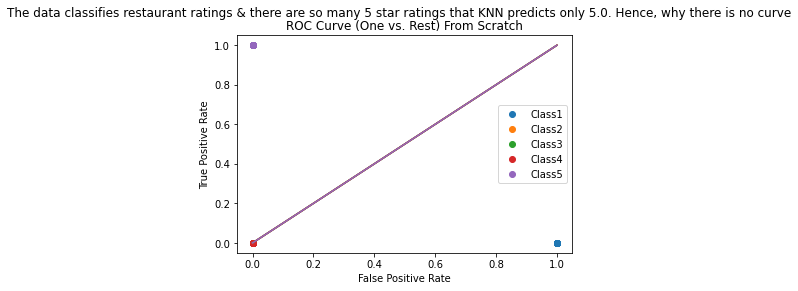

In [21]:
exp.plot_ROC(roc_data)